<a href="https://colab.research.google.com/github/Ziannnniiii/VisiKomputer/blob/main/Jobsheet2%20%26%20Penugasan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Jobsheet 2

# Praktikum 1

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


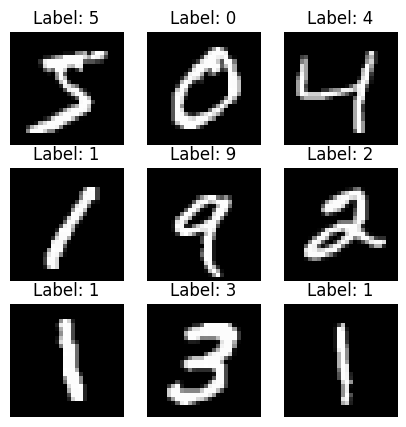

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

plt.figure(figsize=(5,5))
for i in range(9):
 plt.subplot(3,3,i+1)
 plt.imshow(x_train[i], cmap='gray')
 plt.title(f"Label: {y_train[i]}")
 plt.axis('off')
plt.show()

# Praktikum 2


In [3]:
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

print("Memuat dataset MNIST...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

X = X / 255.0

X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

x_train_flat = X_train
x_test_flat = X_test

print("Melatih model SVM...")
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000])

y_pred = clf.predict(x_test_flat)

print("Akurasi:", accuracy_score(y_test, y_pred))

Memuat dataset MNIST...
Melatih model SVM...
Akurasi: 0.9101


# Penugasan

In [3]:
from google.colab import files
uploaded = files.upload()

import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
  """
  Langkah:
  - Konversi ke grayscale
  - Auto-contrast
  - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
  - Crop ke bounding box digit
  - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
  - Normalisasi ke [0,1] dan tambah axis channel
  """

  img = img_pil.convert('L')
  img = ImageOps.autocontrast(img)
  arr = np.array(img).astype(np.uint8)

  if arr.mean() > 127:
    img = ImageOps.invert(img)
    arr = np.array(img)

  thr = np.mean(arr) * 0.8 # ambang adaptif sederhana
  mask = arr > thr
  if mask.any():
    ys, xs = np.where(mask)
    y0, y1 = ys.min(), ys.max()
    x0, x1 = xs.min(), xs.max()
    img = img.crop((x0, y0, x1+1, y1+1))

  img.thumbnail((20, 20), Image.Resampling.LANCZOS)
  w, h = img.size

  canvas = Image.new('L', (28, 28), color=0)
  canvas.paste(img, ((28 - w)//2, (28 - h)//2))

  arr = np.array(canvas).astype('float32') / 255.0

  arr = arr[..., None]
  return canvas, arr

Saving angka.jpg to angka (1).jpg


In [8]:
import numpy as np
from sklearn import svm
from sklearn.datasets import fetch_openml
from PIL import Image

# --- Langkah 1: Persiapan dan Memuat Dataset Training ---
# Memuat dataset MNIST (70.000 gambar, 28x28 piksel)
print("Memuat dataset MNIST...")
X_train, y_train = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

# Normalisasi data: Mengubah nilai piksel dari [0, 255] menjadi [0, 1]
# Ini adalah praktik standar untuk meningkatkan performa model
X_train = X_train / 255.0

# --- Langkah 2: Inisialisasi Model SVM ---
# Gunakan hanya sebagian kecil data untuk pelatihan agar tidak terlalu lama
# Misalnya, gunakan 10.000 sampel pertama
X_subset = X_train[:10000]
y_subset = y_train[:10000]

# Inisialisasi model SVM. 'probability=True' diperlukan untuk mendapatkan nilai 'conf'
clf = svm.SVC(kernel='rbf', gamma='scale', probability=True)

# --- Langkah 3: Melatih Model ---
print("Training the SVM classifier...")
clf.fit(X_subset, y_subset)
print("Pelatihan selesai.")

# --- Langkah 4: Melakukan Prediksi pada Gambar yang Diunggah ---
# 'uploaded' harus menjadi dictionary dengan nama file sebagai key
results = []
for fname in uploaded.keys():
    try:
        img_pil = Image.open(fname)

        # Asumsi fungsi ini mengembalikan data gambar yang sudah di-preprocess
        # dalam format (28, 28, 1) dengan nilai [0, 1]
        _, x = preprocess_to_mnist_28x28(img_pil)

        # Mengubah array 3D (28,28,1) menjadi 2D (1, 784)
        # dan memastikan tipe datanya float64 agar kompatibel dengan model
        x_flat = x.reshape(1, -1).astype(np.float64)

        # Melakukan prediksi
        pred = int(clf.predict(x_flat)[0])

        conf = None
        if hasattr(clf, "predict_proba"):
            conf = float(np.max(clf.predict_proba(x_flat)))

        results.append((fname, pred, conf))
        print(f"{fname} -> Prediksi SVM: {pred}" + (f" (p≈{conf:.2f})" if conf is not None else ""))

    except Exception as e:
        print(f"Error pada {fname}: {e}")

Memuat dataset MNIST...
Training the SVM classifier...
Pelatihan selesai.
angka (1).jpg -> Prediksi SVM: 4 (p≈0.46)


# Praktikum 3

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.8984 - loss: 0.3553 - val_accuracy: 0.9793 - val_loss: 0.0700
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9814 - loss: 0.0629 - val_accuracy: 0.9855 - val_loss: 0.0536
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 17ms/step - accuracy: 0.9879 - loss: 0.0398 - val_accuracy: 0.9867 - val_loss: 0.0475
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9913 - loss: 0.0277 - val_accuracy: 0.9847 - val_loss: 0.0565
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9935 - loss: 0.0209 - val_accuracy: 0.9858 - val_loss: 0.0505


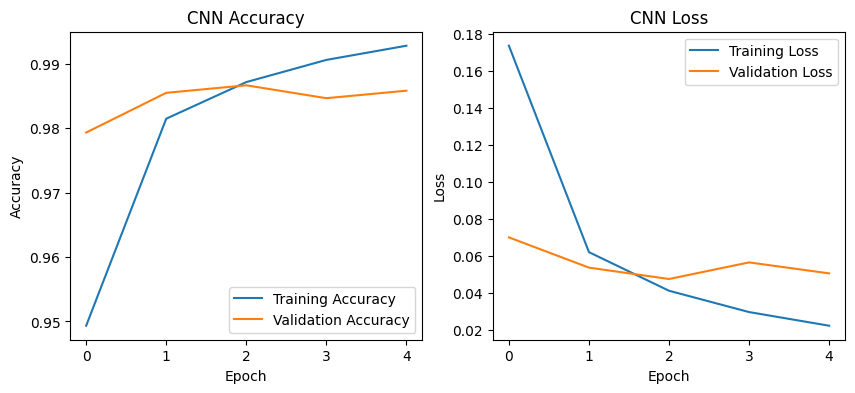

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train_cnn = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test_cnn = x_test.reshape(-1, 28, 28, 1) / 255.0

model = models.Sequential([
  layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Praktikum 4


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 62s 43ms/step - accuracy: 0.3565 - loss: 1.7458 - val_accuracy: 0.5360 - val_loss: 1.3091
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.5739 - loss: 1.2107 - val_accuracy: 0.6290 - val_loss: 1.0564
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.6358 - loss: 1.0409 - val_accuracy: 0.6456 - val_loss: 1.0133
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6676 - loss: 0.9518 - val_accuracy: 0.6452 - val_loss: 1.0373
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 40ms/step - accuracy: 0.6910 - loss: 0.8947 - val_accuracy: 0.6898 - val_loss: 0.9194
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7130 - loss: 0.8336 - val_accuracy: 0.6932 - val_loss: 0.9113
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.7287 - loss: 0.7839 - val_accuracy: 0.6834 - val_loss: 0.9259
Epoch 8/10
1407/1407 ━━

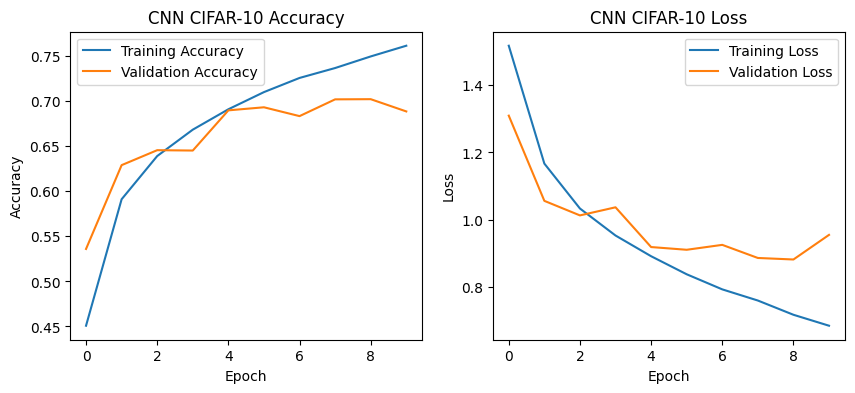

In [7]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
model = models.Sequential([
 layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
 layers.MaxPooling2D((2,2)),
 layers.Conv2D(64, (3,3), activation='relu'),
 layers.MaxPooling2D((2,2)),
 layers.Flatten(),
 layers.Dense(64, activation='relu'),
 layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Praktikum 5

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 625s 443ms/step - accuracy: 0.4568 - loss: 1.5501 - val_accuracy: 0.5716 - val_loss: 1.2128
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 680s 442ms/step - accuracy: 0.5740 - loss: 1.2182 - val_accuracy: 0.5846 - val_loss: 1.1749
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 621s 441ms/step - accuracy: 0.5987 - loss: 1.1451 - val_accuracy: 0.5976 - val_loss: 1.1509
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 600s 425ms/step - accuracy: 0.6170 - loss: 1.0977 - val_accuracy: 0.6100 - val_loss: 1.1208
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 643s 441ms/step - accuracy: 0.6286 - loss: 1.0649 - val_accuracy: 0.6138 - val_loss: 1.1090


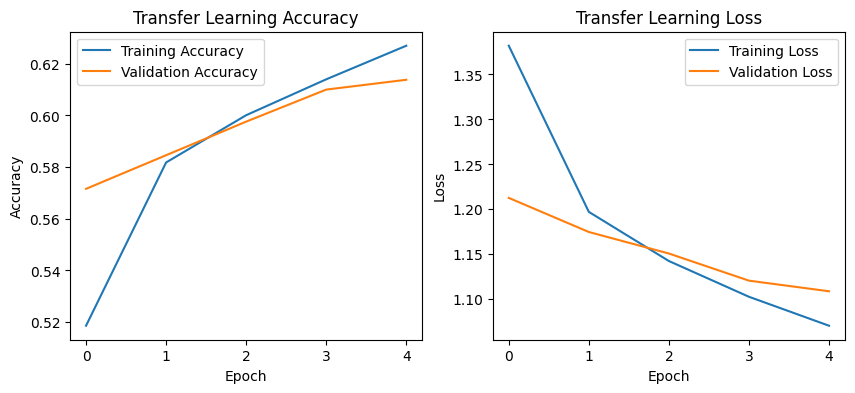

In [8]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(32,32,3))
base_model.trainable = False
model = models.Sequential([
 base_model,
 layers.Flatten(),
 layers.Dense(128, activation='relu'),
 layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Praktikum 6

313/313 ━━━━━━━━━━━━━━━━━━━━ 122s 386ms/step
              precision    recall  f1-score   support

           0       0.62      0.74      0.67      1000
           1       0.67      0.66      0.66      1000
           2       0.55      0.47      0.50      1000
           3       0.43      0.40      0.42      1000
           4       0.59      0.48      0.53      1000
           5       0.52      0.58      0.55      1000
           6       0.62      0.67      0.65      1000
           7       0.67      0.65      0.66      1000
           8       0.76      0.69      0.72      1000
           9       0.58      0.67      0.62      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



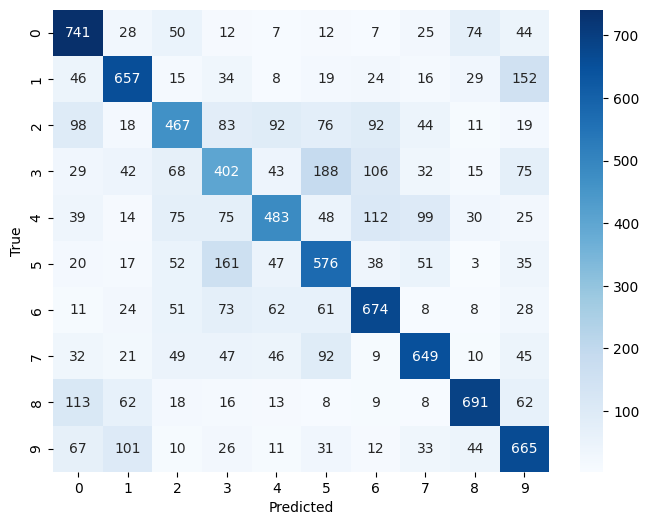

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()